In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import random

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics #Additional sklearn function
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from matplotlib.pylab import rcParams

In [6]:
rcParams['figure.figsize'] = 12, 4
random.seed(1234)
heart = pd.read_csv("data/framingham.csv",na_values = ["?",","])
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# about pd.get_dummies() ...
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

# Example...
It works on categorical attribute

In [10]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [12]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [11]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [9]:
heart['education'] = heart['education'].astype('category')
heart = pd.get_dummies(heart)
heart.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [13]:
heart.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
education_1.0        0
education_2.0        0
education_3.0        0
education_4.0        0
dtype: int64

In [16]:
heart['TenYearCHD'] = heart['TenYearCHD'].astype('category')

In [18]:
heart.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [21]:
# Remove all Null values
heart['BPMeds'].fillna(heart['BPMeds'].mean(),inplace = True)
heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean(),inplace = True)
heart['totChol'].fillna(heart['totChol'].mean(),inplace = True)
heart['BMI'].fillna(heart['BMI'].mean(),inplace = True)
heart['glucose'].fillna(heart['glucose'].mean(),inplace = True)
heart['heartRate'].fillna(heart['heartRate'].mean(),inplace = True)


In [22]:
heart.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
education_1.0      0
education_2.0      0
education_3.0      0
education_4.0      0
dtype: int64

In [24]:
train = heart
target = train['TenYearCHD']
train = train.drop(['TenYearCHD'], axis=1)


In [25]:
def modelfit(alg, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    train.shape
    target.shape
    alg.fit(train, target)
    #Predict training set:
    dtrain_predictions = alg.predict(train)
    dtrain_predprob = alg.predict_proba(train)[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train, target, cv=cv_folds, scoring='roc_auc')
    #Print model report:
    print("\nModel Report")
    print("Accuracy :", metrics.accuracy_score(target, dtrain_predictions))
    print("AUC Score (Train): ", metrics.roc_auc_score(target, dtrain_predprob))
    if performCV:
        print('CV Score : Mean - ',np.mean(cv_score),' | Std - ',np.std(cv_score),' | Min - ',
              np.min(cv_score),' | Max - ',np.max(cv_score))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


In [26]:
param_test1 = {'n_estimators':list(range(10,110,10))}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,
                                min_samples_leaf=5,max_depth=8,max_features='sqrt',random_state=10), 
                                param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(train,target)
gsearch1.best_params_, gsearch1.best_score_


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  preso

({'n_estimators': 20}, 0.6875409707788013)

In [28]:
#Tuning tree-specific parameters
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(10,50,5))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, 
                                        max_features='sqrt', random_state=10), 
                                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(train,target)
gsearch2.best_params_, gsearch2.best_score_


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=20,
                                                  n_iter_no_change=None,
                                                  presort

({'max_depth': 5, 'min_samples_split': 30}, 0.7145206170523593)

In [31]:
gsearch2.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Model Report
Accuracy : 0.8625
AUC Score (Train):  0.8016392869233586
CV Score : Mean -  0.7145251677804612  | Std -  0.013471893117638882  | Min -  0.7017390648079266  | Max -  0.7359543293333766


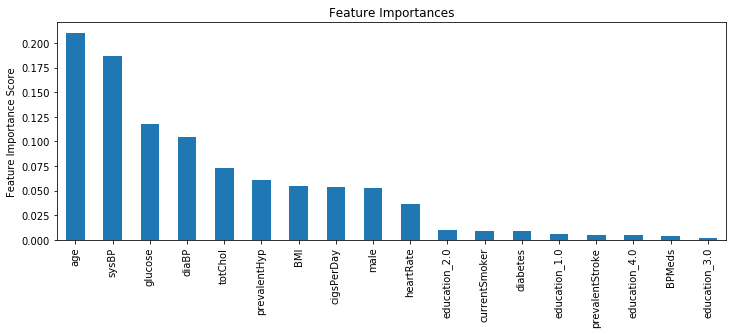

In [32]:
modelfit(gsearch2.best_estimator_)